In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install tensorflow

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Divide the dataset into independent and dependent features
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
#Feature Engineering
geography = pd.get_dummies(x['Geography'], drop_first = True)
gender = pd.get_dummies(x['Gender'], drop_first = True)

In [9]:
#Concatenate these variables with dataframe
x = x.drop (['Geography', 'Gender'], axis = 1)

In [10]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
x = pd.concat([x, geography, gender], axis=1)

In [12]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
x_train.shape

(8000, 11)

In [18]:
## Creating ANN

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ReLU, ELU
from tensorflow.keras.layers import Dropout

In [21]:
# Initialize ANN
classifier = Sequential()

In [23]:
# Adding the input layer
classifier.add(Dense(units = 11, activation = 'relu')) #11 because there are 11 nodes

In [24]:
#Adding the first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))

In [25]:
#Adding the second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))

In [26]:
#Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [27]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [34]:
import keras

In [35]:
#Early Stopping

import tensorflow as tf
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [36]:
model_history = classifier.fit(x_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3134 - accuracy: 0.8716 - val_loss: 0.3558 - val_accuracy: 0.8573
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3128 - accuracy: 0.8726 - val_loss: 0.3541 - val_accuracy: 0.8580
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3126 - accuracy: 0.8712 - val_loss: 0.3593 - val_accuracy: 0.8554
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3125 - accuracy: 0.8675 - val_loss: 0.3609 - val_accuracy: 0.8576
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3116 - accuracy: 0.8709 - val_loss: 0.3585 - val_accuracy: 0.8580
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3115 - accuracy: 0.8707 - val_loss: 0.3555 - val_accuracy: 0.8554
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3104 - accuracy: 0.8709 - val_loss: 0.3577 - val_accuracy:

In [38]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

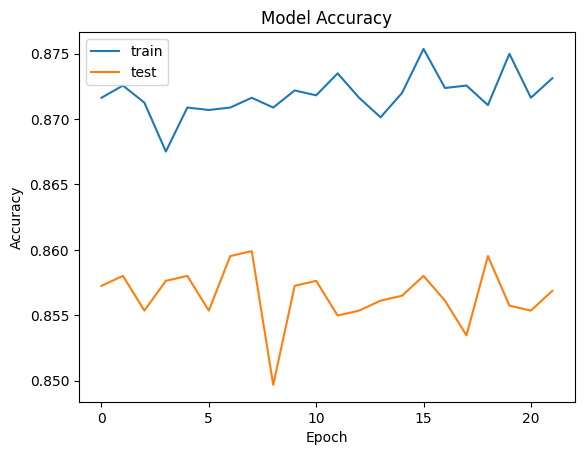

In [39]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

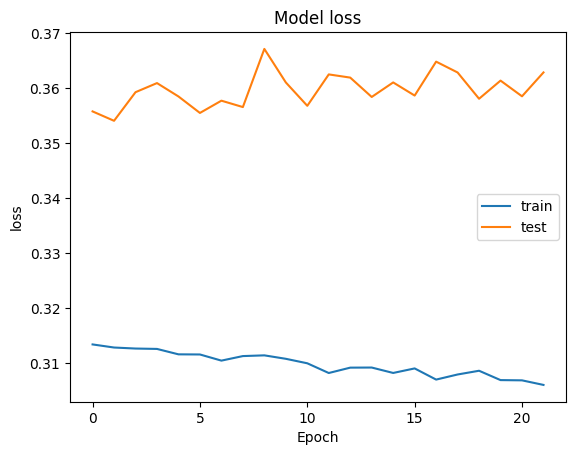

In [40]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

In [42]:
#making the predictoions and evaluating the model
#Predicting the test set results

y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 1s 6ms/step


In [43]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1505,   90],
       [ 204,  201]])

In [45]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.853

In [47]:
#Get the weights
classifier.get_weights()

[array([[-0.16324918,  0.14601414, -0.13899313,  0.06075226,  0.07857127,
         -0.175071  , -0.11033802,  0.17384954, -0.04994165, -0.10906089,
         -0.12644134],
        [ 1.2475307 ,  0.5875363 , -0.4703128 ,  0.42701855, -0.01507683,
          1.0349041 ,  0.02732933,  0.25988707,  0.25063542,  0.1174383 ,
         -0.04927401],
        [ 0.11303626,  0.15009281, -0.27323428,  0.2693593 ,  0.08733443,
         -0.31230602,  0.09040447, -0.27205044,  0.02000568, -0.29289684,
          0.2065568 ],
        [-0.25472128, -0.0890372 ,  0.19948173, -0.19546348, -0.05158088,
         -0.00239099, -1.1548461 ,  0.29629   ,  0.23006704,  0.5114023 ,
         -0.7133293 ],
        [-0.58735985, -0.03980451,  0.5054902 , -0.10329771,  0.7897012 ,
          0.52110106, -0.661011  , -0.55176145,  0.7034385 , -0.41861737,
          0.02059228],
        [ 0.07287838, -0.527087  , -0.06929628,  0.59040695, -0.42271855,
          0.10036255,  0.05387697,  0.7922524 ,  0.02902531, -0.3649373